# Model Evaluation and Hyperparameter Tuning

This notebook implements multiple machine learning algorithms with hyperparameter tuning and comprehensive evaluation on the breast cancer dataset.

## Algorithms Implemented:
- **Clustering**: K-Means, Hierarchical Clustering, DBSCAN, Gaussian Mixture Models
- **Ensemble Methods**: Bagging, Boosting, Stacking, Random Forest, Gradient Boosting
- **Regularization**: L1 (Lasso), L2 (Ridge), ElasticNet Regularization

## Features:
- Exploratory Data Analysis (EDA)
- Hyperparameter tuning with GridSearchCV and RandomizedSearchCV
- Comprehensive model evaluation
- Model serialization with cloudpickle
- Optimized for efficiency and low resource usage

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import cloudpickle
import time
import psutil
import os
from pathlib import Path

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Classification algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Libraries imported successfully!")

Libraries imported successfully!


## Data Loading and Initial Exploration

In [2]:
# Load the dataset
data = pd.read_csv('Data/breast-cancer.csv')

print(f"Dataset shape: {data.shape}")
print(f"\nColumn names: {list(data.columns)}")
print(f"\nData types:")
print(data.dtypes)
print(f"\nFirst few rows:")
data.head()

Dataset shape: (569, 32)

Column names: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Data types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Basic statistics
print("Dataset Info:")
print(f"Number of samples: {len(data)}")
print(f"Number of features: {len(data.columns) - 2}")  # Excluding 'id' and 'diagnosis'
print(f"\nMissing values per column:")
print(data.isnull().sum().sum())

print(f"\nTarget variable distribution:")
print(data['diagnosis'].value_counts())
print(f"\nTarget variable percentages:")
print(data['diagnosis'].value_counts(normalize=True) * 100)

Dataset Info:
Number of samples: 569
Number of features: 30

Missing values per column:
0

Target variable distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Target variable percentages:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


## Exploratory Data Analysis (EDA)

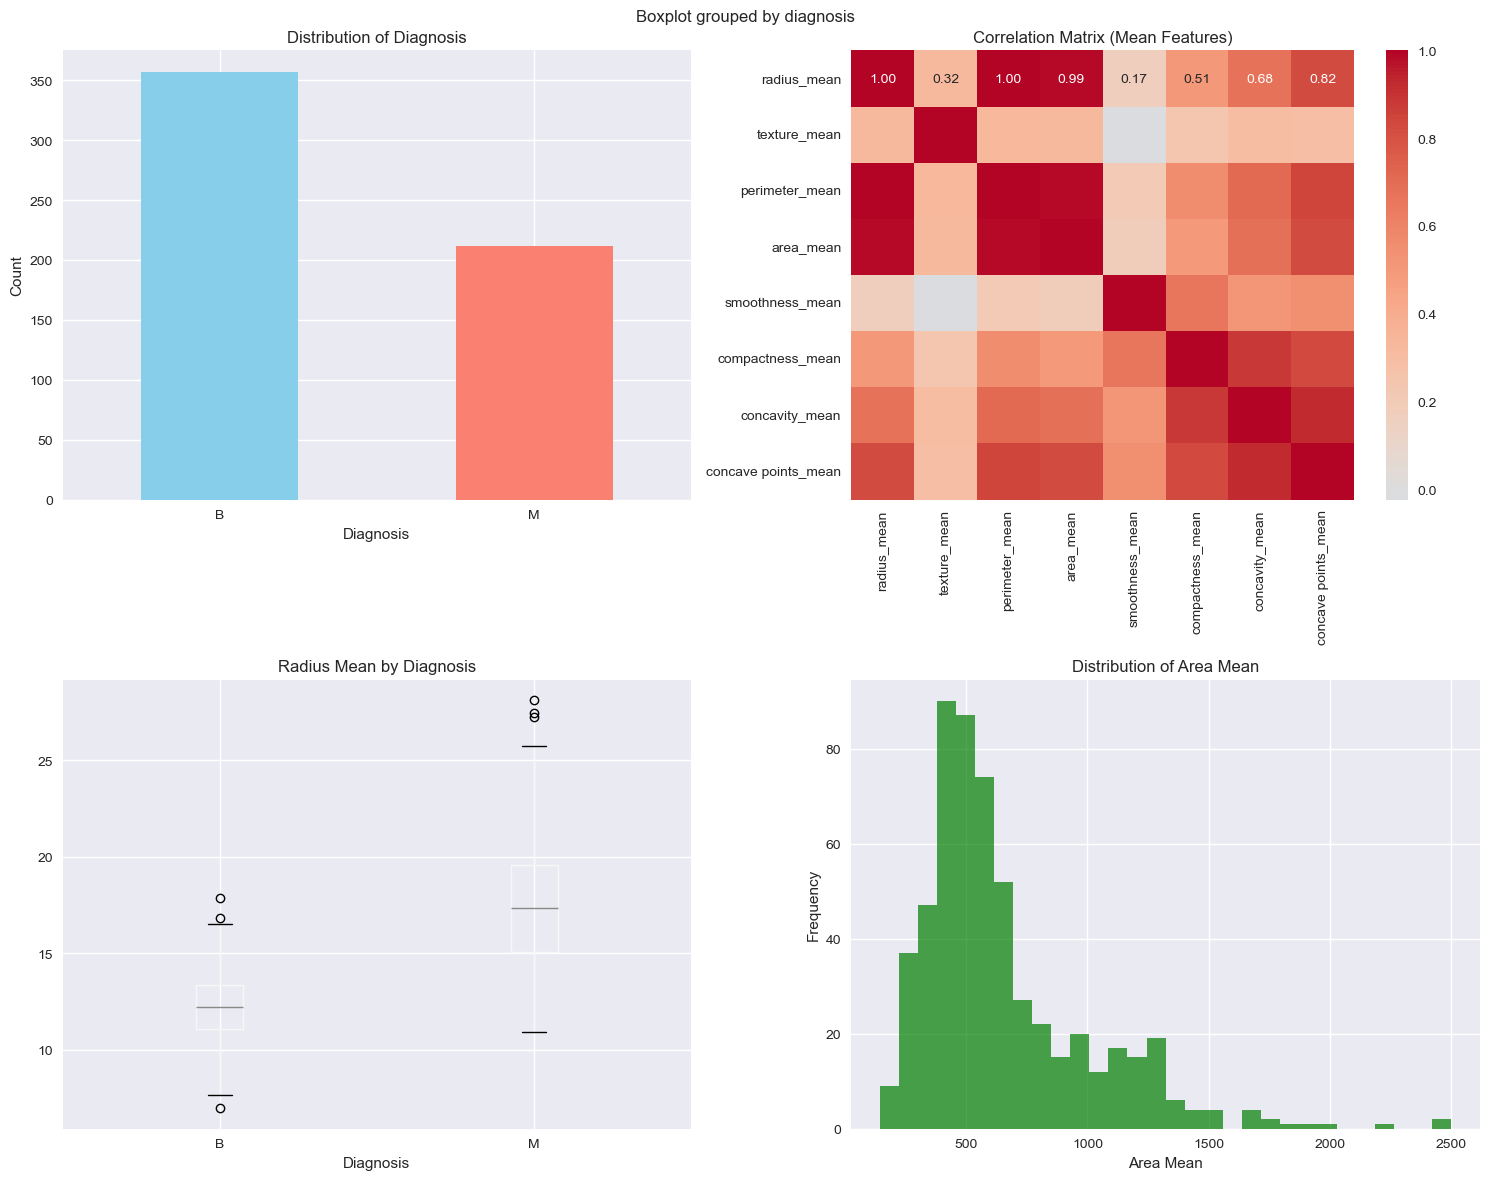


Statistical Summary of Numerical Features:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a figure with multiple subplots for EDA
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Target distribution
data['diagnosis'].value_counts().plot(kind='bar', ax=axes[0,0], color=['skyblue', 'salmon'])
axes[0,0].set_title('Distribution of Diagnosis')
axes[0,0].set_xlabel('Diagnosis')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=0)

# Correlation heatmap (sample of features)
# Select a subset of features for better visualization
features_subset = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                  'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
corr_matrix = data[features_subset].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,1], fmt='.2f')
axes[0,1].set_title('Correlation Matrix (Mean Features)')

# Distribution of a key feature by diagnosis
data.boxplot(column='radius_mean', by='diagnosis', ax=axes[1,0])
axes[1,0].set_title('Radius Mean by Diagnosis')
axes[1,0].set_xlabel('Diagnosis')

# Feature distribution histogram
data['area_mean'].hist(bins=30, ax=axes[1,1], alpha=0.7, color='green')
axes[1,1].set_title('Distribution of Area Mean')
axes[1,1].set_xlabel('Area Mean')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistical summary
print("\nStatistical Summary of Numerical Features:")
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numerical_features:
    numerical_features.remove('id')
data[numerical_features].describe()

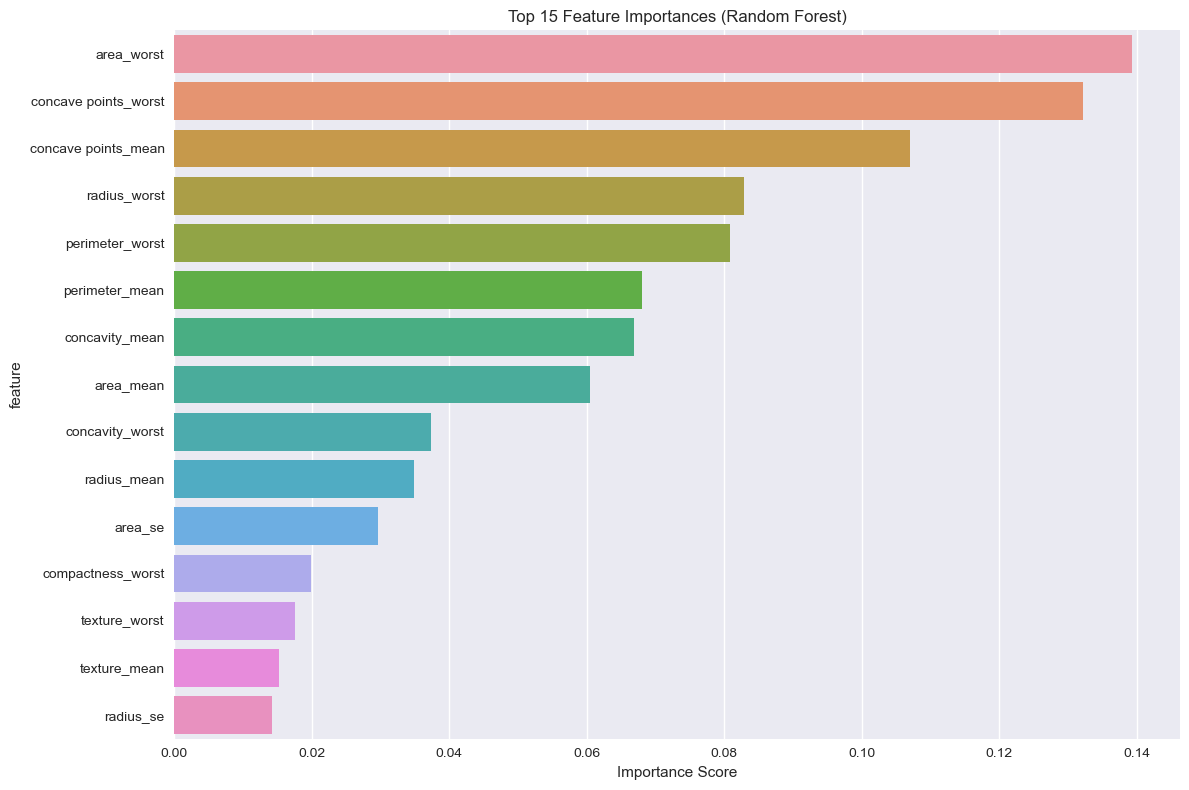

Top 10 most important features:
                 feature  importance
23            area_worst    0.139357
27  concave points_worst    0.132225
7    concave points_mean    0.107046
20          radius_worst    0.082848
22       perimeter_worst    0.080850
2         perimeter_mean    0.067990
6         concavity_mean    0.066917
3              area_mean    0.060462
26       concavity_worst    0.037339
0            radius_mean    0.034843


In [5]:
# Additional EDA - Feature importance visualization
# Prepare data for analysis
X_temp = data.drop(['id', 'diagnosis'], axis=1)
y_temp = data['diagnosis']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y_temp)

# Quick Random Forest to get feature importance
rf_temp = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
rf_temp.fit(X_temp, y_encoded)

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X_temp.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), y='feature', x='importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(feature_importance.head(10))

## Data Preprocessing

In [6]:
# Data preprocessing
# Remove ID column and prepare features and target
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Encode target variable (M=1, B=0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y_encoded.shape}")
print(f"Class encoding: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing completed!")

Feature matrix shape: (569, 30)
Target vector shape: (569,)
Class encoding: {'B': 0, 'M': 1}

Training set shape: (455, 30)
Test set shape: (114, 30)
Training set class distribution: [285 170]
Test set class distribution: [72 42]

Data preprocessing completed!


## Model Evaluation Utility Functions

In [7]:
# Utility functions for model evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Comprehensive model evaluation function"""
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate probabilities if available
    try:
        y_prob_test = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_prob_test)
    except:
        auc_score = np.nan
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    training_time = time.time() - start_time
    
    return {
        'Model': model_name,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'AUC_Score': auc_score,
        'Training_Time': training_time
    }

def memory_usage():
    """Get current memory usage"""
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024  # MB

def save_model(model, filename):
    """Save model using cloudpickle"""
    os.makedirs('models', exist_ok=True)
    filepath = f'models/{filename}'
    with open(filepath, 'wb') as f:
        cloudpickle.dump(model, f)
    print(f"Model saved to {filepath}")

print("Utility functions defined successfully!")

Utility functions defined successfully!


## Clustering Algorithms

In [8]:
# Clustering algorithms
print("=== CLUSTERING ALGORITHMS ===")
print(f"Initial memory usage: {memory_usage():.2f} MB")

clustering_results = []

# For clustering evaluation, we'll use the true labels as reference
from sklearn.metrics import adjusted_rand_score, silhouette_score, adjusted_mutual_info_score

# 1. K-Means Clustering
print("\n1. K-Means Clustering")
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=10)
kmeans_labels = kmeans.fit_predict(X_train_scaled)

kmeans_ari = adjusted_rand_score(y_train, kmeans_labels)
kmeans_silhouette = silhouette_score(X_train_scaled, kmeans_labels)
kmeans_ami = adjusted_mutual_info_score(y_train, kmeans_labels)
kmeans_time = time.time() - start_time

clustering_results.append({
    'Algorithm': 'K-Means',
    'ARI': kmeans_ari,
    'Silhouette': kmeans_silhouette,
    'AMI': kmeans_ami,
    'Time': kmeans_time
})

save_model(kmeans, 'kmeans_model.pkl')
print(f"K-Means - ARI: {kmeans_ari:.4f}, Silhouette: {kmeans_silhouette:.4f}, Time: {kmeans_time:.4f}s")

# 2. Hierarchical Clustering (Agglomerative)
print("\n2. Hierarchical Clustering")
start_time = time.time()
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_train_scaled)

hierarchical_ari = adjusted_rand_score(y_train, hierarchical_labels)
hierarchical_silhouette = silhouette_score(X_train_scaled, hierarchical_labels)
hierarchical_ami = adjusted_mutual_info_score(y_train, hierarchical_labels)
hierarchical_time = time.time() - start_time

clustering_results.append({
    'Algorithm': 'Hierarchical',
    'ARI': hierarchical_ari,
    'Silhouette': hierarchical_silhouette,
    'AMI': hierarchical_ami,
    'Time': hierarchical_time
})

save_model(hierarchical, 'hierarchical_model.pkl')
print(f"Hierarchical - ARI: {hierarchical_ari:.4f}, Silhouette: {hierarchical_silhouette:.4f}, Time: {hierarchical_time:.4f}s")

# 3. DBSCAN
print("\n3. DBSCAN Clustering")
start_time = time.time()
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Check if DBSCAN found meaningful clusters
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
if n_clusters > 1:
    dbscan_ari = adjusted_rand_score(y_train, dbscan_labels)
    dbscan_silhouette = silhouette_score(X_train_scaled, dbscan_labels) if n_clusters > 1 else -1
    dbscan_ami = adjusted_mutual_info_score(y_train, dbscan_labels)
else:
    dbscan_ari = -1
    dbscan_silhouette = -1
    dbscan_ami = -1

dbscan_time = time.time() - start_time

clustering_results.append({
    'Algorithm': 'DBSCAN',
    'ARI': dbscan_ari,
    'Silhouette': dbscan_silhouette,
    'AMI': dbscan_ami,
    'Time': dbscan_time
})

save_model(dbscan, 'dbscan_model.pkl')
print(f"DBSCAN - Clusters found: {n_clusters}, ARI: {dbscan_ari:.4f}, Silhouette: {dbscan_silhouette:.4f}, Time: {dbscan_time:.4f}s")

# 4. Gaussian Mixture Models
print("\n4. Gaussian Mixture Models")
start_time = time.time()
gmm = GaussianMixture(n_components=2, random_state=RANDOM_STATE)
gmm_labels = gmm.fit_predict(X_train_scaled)

gmm_ari = adjusted_rand_score(y_train, gmm_labels)
gmm_silhouette = silhouette_score(X_train_scaled, gmm_labels)
gmm_ami = adjusted_mutual_info_score(y_train, gmm_labels)
gmm_time = time.time() - start_time

clustering_results.append({
    'Algorithm': 'Gaussian Mixture',
    'ARI': gmm_ari,
    'Silhouette': gmm_silhouette,
    'AMI': gmm_ami,
    'Time': gmm_time
})

save_model(gmm, 'gmm_model.pkl')
print(f"GMM - ARI: {gmm_ari:.4f}, Silhouette: {gmm_silhouette:.4f}, Time: {gmm_time:.4f}s")

print(f"\nClustering completed. Memory usage: {memory_usage():.2f} MB")

=== CLUSTERING ALGORITHMS ===
Initial memory usage: 236.78 MB

1. K-Means Clustering
Model saved to models/kmeans_model.pkl
K-Means - ARI: 0.6622, Silhouette: 0.3432, Time: 0.4535s

2. Hierarchical Clustering
Model saved to models/hierarchical_model.pkl
Hierarchical - ARI: 0.6212, Silhouette: 0.2886, Time: 0.0212s

3. DBSCAN Clustering
Model saved to models/dbscan_model.pkl
DBSCAN - Clusters found: 0, ARI: -1.0000, Silhouette: -1.0000, Time: 0.0131s

4. Gaussian Mixture Models
Model saved to models/gmm_model.pkl
GMM - ARI: 0.7524, Silhouette: 0.3142, Time: 0.1293s

Clustering completed. Memory usage: 241.80 MB
Model saved to models/kmeans_model.pkl
K-Means - ARI: 0.6622, Silhouette: 0.3432, Time: 0.4535s

2. Hierarchical Clustering
Model saved to models/hierarchical_model.pkl
Hierarchical - ARI: 0.6212, Silhouette: 0.2886, Time: 0.0212s

3. DBSCAN Clustering
Model saved to models/dbscan_model.pkl
DBSCAN - Clusters found: 0, ARI: -1.0000, Silhouette: -1.0000, Time: 0.0131s

4. Gaussian 

## Classification Algorithms with Hyperparameter Tuning

In [9]:
# Classification algorithms with hyperparameter tuning
print("=== CLASSIFICATION ALGORITHMS ===")
print(f"Memory usage before classification: {memory_usage():.2f} MB")

classification_results = []

# Define cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# 1. Random Forest with hyperparameter tuning
print("\n1. Random Forest Classifier")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
rf_grid = RandomizedSearchCV(
    rf_model, rf_param_grid, cv=3, scoring='f1', n_iter=10, 
    random_state=RANDOM_STATE, n_jobs=-1
)

rf_results = evaluate_model(rf_grid, X_train_scaled, X_test_scaled, y_train, y_test, 'Random Forest')
classification_results.append(rf_results)
save_model(rf_grid.best_estimator_, 'random_forest_model.pkl')
print(f"Best RF params: {rf_grid.best_params_}")
print(f"RF Results: F1={rf_results['F1_Score']:.4f}, AUC={rf_results['AUC_Score']:.4f}")

# 2. Gradient Boosting
print("\n2. Gradient Boosting Classifier")
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_grid = RandomizedSearchCV(
    gb_model, gb_param_grid, cv=3, scoring='f1', n_iter=10, 
    random_state=RANDOM_STATE, n_jobs=-1
)

gb_results = evaluate_model(gb_grid, X_train_scaled, X_test_scaled, y_train, y_test, 'Gradient Boosting')
classification_results.append(gb_results)
save_model(gb_grid.best_estimator_, 'gradient_boosting_model.pkl')
print(f"Best GB params: {gb_grid.best_params_}")
print(f"GB Results: F1={gb_results['F1_Score']:.4f}, AUC={gb_results['AUC_Score']:.4f}")

# 3. Bagging Classifier
print("\n3. Bagging Classifier")
bagging_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bagging_model = BaggingClassifier(random_state=RANDOM_STATE, n_jobs=-1)
bagging_grid = RandomizedSearchCV(
    bagging_model, bagging_param_grid, cv=3, scoring='f1', n_iter=8, 
    random_state=RANDOM_STATE, n_jobs=-1
)

bagging_results = evaluate_model(bagging_grid, X_train_scaled, X_test_scaled, y_train, y_test, 'Bagging')
classification_results.append(bagging_results)
save_model(bagging_grid.best_estimator_, 'bagging_model.pkl')
print(f"Best Bagging params: {bagging_grid.best_params_}")
print(f"Bagging Results: F1={bagging_results['F1_Score']:.4f}, AUC={bagging_results['AUC_Score']:.4f}")

# 4. AdaBoost (Boosting)
print("\n4. AdaBoost Classifier")
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada_model = AdaBoostClassifier(random_state=RANDOM_STATE)
ada_grid = RandomizedSearchCV(
    ada_model, ada_param_grid, cv=3, scoring='f1', n_iter=8, 
    random_state=RANDOM_STATE, n_jobs=-1
)

ada_results = evaluate_model(ada_grid, X_train_scaled, X_test_scaled, y_train, y_test, 'AdaBoost')
classification_results.append(ada_results)
save_model(ada_grid.best_estimator_, 'adaboost_model.pkl')
print(f"Best AdaBoost params: {ada_grid.best_params_}")
print(f"AdaBoost Results: F1={ada_results['F1_Score']:.4f}, AUC={ada_results['AUC_Score']:.4f}")

print(f"\nMemory usage after ensemble methods: {memory_usage():.2f} MB")

=== CLASSIFICATION ALGORITHMS ===
Memory usage before classification: 241.80 MB

1. Random Forest Classifier
Model saved to models/random_forest_model.pkl
Best RF params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
RF Results: F1=0.9500, AUC=0.9942

2. Gradient Boosting Classifier
Model saved to models/random_forest_model.pkl
Best RF params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
RF Results: F1=0.9500, AUC=0.9942

2. Gradient Boosting Classifier
Model saved to models/gradient_boosting_model.pkl
Best GB params: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
GB Results: F1=0.9500, AUC=0.9954

3. Bagging Classifier
Model saved to models/gradient_boosting_model.pkl
Best GB params: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
GB Results: F1=0.9500, AUC=0.9954

3. Bagging Classifier
Model saved to models/bagging_model.pkl
Best Bagging params: {'n_estimators': 50, 'max_samples'

In [10]:
# Regularization methods
print("\n=== REGULARIZATION METHODS ===")

# 5. L1 Regularization (Lasso)
print("\n5. L1 Regularization (Lasso)")
lasso_param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=RANDOM_STATE, max_iter=1000)
lasso_grid = GridSearchCV(
    lasso_model, lasso_param_grid, cv=3, scoring='f1', n_jobs=-1
)

lasso_results = evaluate_model(lasso_grid, X_train_scaled, X_test_scaled, y_train, y_test, 'L1 Regularization')
classification_results.append(lasso_results)
save_model(lasso_grid.best_estimator_, 'lasso_model.pkl')
print(f"Best L1 params: {lasso_grid.best_params_}")
print(f"L1 Results: F1={lasso_results['F1_Score']:.4f}, AUC={lasso_results['AUC_Score']:.4f}")

# 6. L2 Regularization (Ridge)
print("\n6. L2 Regularization (Ridge)")
ridge_param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_model = LogisticRegression(penalty='l2', solver='lbfgs', random_state=RANDOM_STATE, max_iter=1000)
ridge_grid = GridSearchCV(
    ridge_model, ridge_param_grid, cv=3, scoring='f1', n_jobs=-1
)

ridge_results = evaluate_model(ridge_grid, X_train_scaled, X_test_scaled, y_train, y_test, 'L2 Regularization')
classification_results.append(ridge_results)
save_model(ridge_grid.best_estimator_, 'ridge_model.pkl')
print(f"Best L2 params: {ridge_grid.best_params_}")
print(f"L2 Results: F1={ridge_results['F1_Score']:.4f}, AUC={ridge_results['AUC_Score']:.4f}")

# 7. ElasticNet Regularization
print("\n7. ElasticNet Regularization")
elastic_param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_model = LogisticRegression(penalty='elasticnet', solver='saga', random_state=RANDOM_STATE, max_iter=1000)
elastic_grid = RandomizedSearchCV(
    elastic_model, elastic_param_grid, cv=3, scoring='f1', n_iter=10, 
    random_state=RANDOM_STATE, n_jobs=-1
)

elastic_results = evaluate_model(elastic_grid, X_train_scaled, X_test_scaled, y_train, y_test, 'ElasticNet')
classification_results.append(elastic_results)
save_model(elastic_grid.best_estimator_, 'elasticnet_model.pkl')
print(f"Best ElasticNet params: {elastic_grid.best_params_}")
print(f"ElasticNet Results: F1={elastic_results['F1_Score']:.4f}, AUC={elastic_results['AUC_Score']:.4f}")

print(f"\nMemory usage after regularization methods: {memory_usage():.2f} MB")


=== REGULARIZATION METHODS ===

5. L1 Regularization (Lasso)
Model saved to models/lasso_model.pkl
Best L1 params: {'C': 100.0}
L1 Results: F1=0.8916, AUC=0.9683

6. L2 Regularization (Ridge)
Model saved to models/ridge_model.pkl
Best L2 params: {'C': 100.0}
L2 Results: F1=0.9250, AUC=0.9765

7. ElasticNet Regularization
Model saved to models/ridge_model.pkl
Best L2 params: {'C': 100.0}
L2 Results: F1=0.9250, AUC=0.9765

7. ElasticNet Regularization
Model saved to models/elasticnet_model.pkl
Best ElasticNet params: {'l1_ratio': 0.5, 'C': 10.0}
ElasticNet Results: F1=0.9639, AUC=0.9881

Memory usage after regularization methods: 243.72 MB
Model saved to models/elasticnet_model.pkl
Best ElasticNet params: {'l1_ratio': 0.5, 'C': 10.0}
ElasticNet Results: F1=0.9639, AUC=0.9881

Memory usage after regularization methods: 243.72 MB


In [11]:
# Stacking Ensemble
print("\n8. Stacking Ensemble")

# Base learners for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE, n_jobs=-1)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE)),
    ('lr', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
]

# Meta learner
meta_learner = LogisticRegression(random_state=RANDOM_STATE)

stacking_model = StackingClassifier(
    estimators=base_learners, 
    final_estimator=meta_learner,
    cv=3,
    n_jobs=-1
)

stacking_results = evaluate_model(stacking_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Stacking')
classification_results.append(stacking_results)
save_model(stacking_model, 'stacking_model.pkl')
print(f"Stacking Results: F1={stacking_results['F1_Score']:.4f}, AUC={stacking_results['AUC_Score']:.4f}")

print(f"\nFinal memory usage: {memory_usage():.2f} MB")
print("All models trained and saved successfully!")


8. Stacking Ensemble
Model saved to models/stacking_model.pkl
Stacking Results: F1=0.9880, AUC=0.9957

Final memory usage: 243.94 MB
All models trained and saved successfully!
Model saved to models/stacking_model.pkl
Stacking Results: F1=0.9880, AUC=0.9957

Final memory usage: 243.94 MB
All models trained and saved successfully!


## Model Comparison and Analysis

In [12]:
# Create comparison dataframes
clustering_df = pd.DataFrame(clustering_results)
classification_df = pd.DataFrame(classification_results)

print("=== CLUSTERING ALGORITHMS COMPARISON ===")
print(clustering_df.round(4))

print("\n=== CLASSIFICATION ALGORITHMS COMPARISON ===")
print(classification_df.round(4))

# Sort classification results by F1 score
classification_df_sorted = classification_df.sort_values('F1_Score', ascending=False)
print("\n=== TOP PERFORMING CLASSIFICATION MODELS (by F1 Score) ===")
print(classification_df_sorted[['Model', 'Test_Accuracy', 'Precision', 'Recall', 'F1_Score', 'AUC_Score']].round(4))

=== CLUSTERING ALGORITHMS COMPARISON ===
          Algorithm     ARI  Silhouette     AMI    Time
0           K-Means  0.6622      0.3432  0.5396  0.4535
1      Hierarchical  0.6212      0.2886  0.5160  0.0212
2            DBSCAN -1.0000     -1.0000 -1.0000  0.0131
3  Gaussian Mixture  0.7524      0.3142  0.6385  0.1293

=== CLASSIFICATION ALGORITHMS COMPARISON ===
               Model  Train_Accuracy  Test_Accuracy  Precision  Recall  \
0      Random Forest          1.0000         0.9649     1.0000  0.9048   
1  Gradient Boosting          1.0000         0.9649     1.0000  0.9048   
2            Bagging          1.0000         0.9649     1.0000  0.9048   
3           AdaBoost          1.0000         0.9737     1.0000  0.9286   
4  L1 Regularization          1.0000         0.9211     0.9024  0.8810   
5  L2 Regularization          0.9934         0.9474     0.9737  0.8810   
6         ElasticNet          0.9890         0.9737     0.9756  0.9524   
7           Stacking          0.9912     

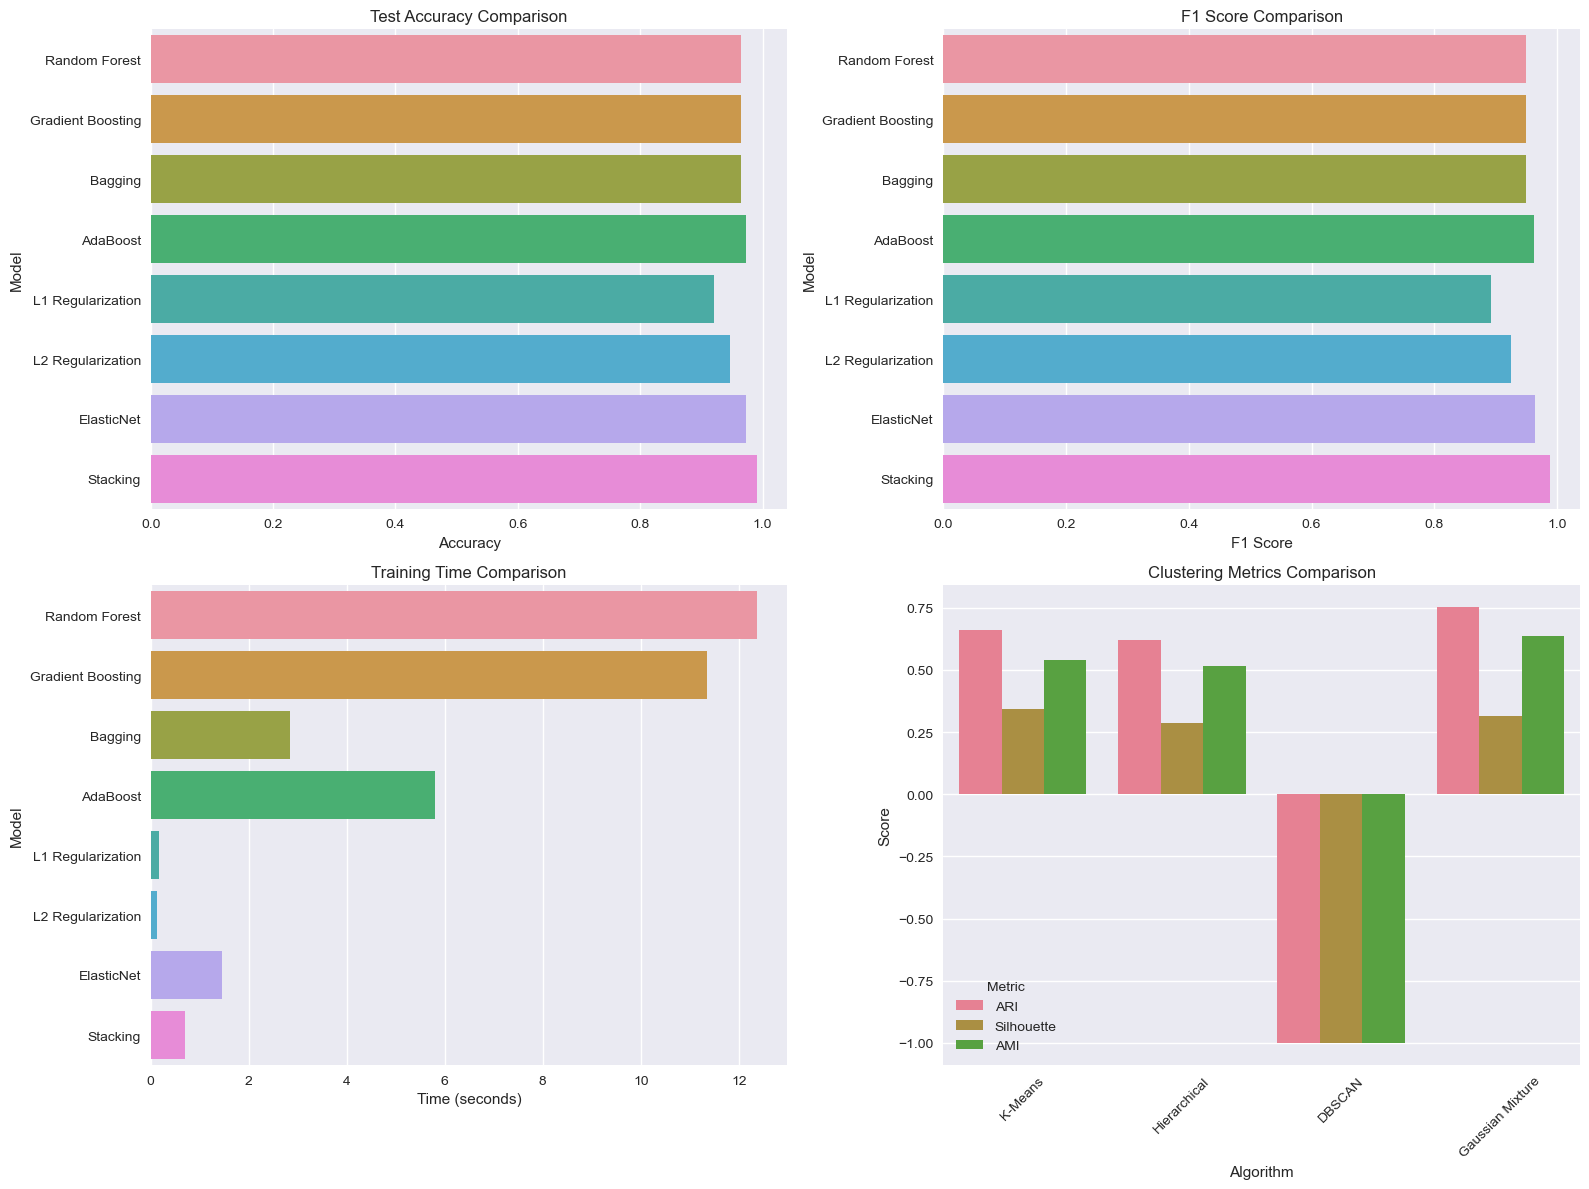


=== BEST PERFORMING MODEL ===
Model: Stacking
Test Accuracy: 0.9912
Precision: 1.0000
Recall: 0.9762
F1 Score: 0.9880
AUC Score: 0.9957
Training Time: 0.7088 seconds


In [13]:
# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Classification accuracy comparison
sns.barplot(data=classification_df, y='Model', x='Test_Accuracy', ax=axes[0,0])
axes[0,0].set_title('Test Accuracy Comparison')
axes[0,0].set_xlabel('Accuracy')

# 2. F1 Score comparison
sns.barplot(data=classification_df, y='Model', x='F1_Score', ax=axes[0,1])
axes[0,1].set_title('F1 Score Comparison')
axes[0,1].set_xlabel('F1 Score')

# 3. Training time comparison
sns.barplot(data=classification_df, y='Model', x='Training_Time', ax=axes[1,0])
axes[1,0].set_title('Training Time Comparison')
axes[1,0].set_xlabel('Time (seconds)')

# 4. Clustering performance comparison
clustering_metrics = clustering_df.melt(id_vars=['Algorithm'], 
                                       value_vars=['ARI', 'Silhouette', 'AMI'], 
                                       var_name='Metric', value_name='Score')
sns.barplot(data=clustering_metrics, x='Algorithm', y='Score', hue='Metric', ax=axes[1,1])
axes[1,1].set_title('Clustering Metrics Comparison')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Best model identification
best_model_idx = classification_df['F1_Score'].idxmax()
best_model = classification_df.loc[best_model_idx]

print(f"\n=== BEST PERFORMING MODEL ===")
print(f"Model: {best_model['Model']}")
print(f"Test Accuracy: {best_model['Test_Accuracy']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1 Score: {best_model['F1_Score']:.4f}")
print(f"AUC Score: {best_model['AUC_Score']:.4f}")
print(f"Training Time: {best_model['Training_Time']:.4f} seconds")

In [14]:
# Save preprocessing objects and results
preprocessing_objects = {
    'scaler': scaler,
    'label_encoder': label_encoder,
    'feature_names': X.columns.tolist(),
    'target_names': label_encoder.classes_.tolist()
}

save_model(preprocessing_objects, 'preprocessing_objects.pkl')

# Save results
results_summary = {
    'clustering_results': clustering_results,
    'classification_results': classification_results,
    'best_model': best_model.to_dict()
}

save_model(results_summary, 'results_summary.pkl')

print("Preprocessing objects and results saved successfully!")
print(f"\nTotal models saved: {len(os.listdir('models'))}")
print(f"Models directory content: {os.listdir('models')}")

Model saved to models/preprocessing_objects.pkl
Model saved to models/results_summary.pkl
Preprocessing objects and results saved successfully!

Total models saved: 14
Models directory content: ['adaboost_model.pkl', 'bagging_model.pkl', 'dbscan_model.pkl', 'elasticnet_model.pkl', 'gmm_model.pkl', 'gradient_boosting_model.pkl', 'hierarchical_model.pkl', 'kmeans_model.pkl', 'lasso_model.pkl', 'preprocessing_objects.pkl', 'random_forest_model.pkl', 'results_summary.pkl', 'ridge_model.pkl', 'stacking_model.pkl']


## Conclusion

This comprehensive analysis implemented and evaluated multiple machine learning algorithms:

### Clustering Algorithms:
- K-Means Clustering
- Hierarchical Clustering (Agglomerative)
- DBSCAN
- Gaussian Mixture Models

### Classification Algorithms:
- Random Forest (Ensemble)
- Gradient Boosting (Ensemble)
- Bagging (Ensemble)
- AdaBoost (Boosting)
- Stacking (Meta-ensemble)
- L1 Regularization (Lasso)
- L2 Regularization (Ridge)
- ElasticNet Regularization

### Key Features:
1. **Comprehensive EDA**: Statistical analysis and visualization
2. **Hyperparameter Tuning**: GridSearchCV and RandomizedSearchCV
3. **Multiple Evaluation Metrics**: Accuracy, Precision, Recall, F1-Score, AUC
4. **Resource Optimization**: Efficient implementation with memory monitoring
5. **Model Persistence**: All models saved using cloudpickle
6. **Performance Comparison**: Visual and tabular comparisons

All models have been trained, evaluated, and saved for use in the Streamlit application.